# Chapter 4: Building Good Training Sets – Data Preprocessing
The quality of data and the amount of useful information that it contains are key factors that determine how well a machine learning algorithm can learn. This chapter discusses the essential data preprocessing techniques that are essential for building good machine learning models. The topics covered include the following: (a) Removing and imputing missing values from a dataset; (b) Getting categorical data into shape for machine learning algorithms, and (c) Selecting relevant features for the model construction.

# Dealing with missing data

In [175]:
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

In [176]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))

In [177]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [178]:
# return the number of missing values per column using sum method
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [179]:
# return the number of missing values per row using sum method
df.isnull().sum(axis=1)

0    0
1    1
2    1
dtype: int64

In [180]:
# access the underlying NumPy array of the DataFrame via the values attribute
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [ 0., 11., 12., nan]])

# Eliminating samples or features with missing values

In [181]:
# drop rows with missing values using the dropna method:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [182]:
# drop columns that have at least one NaN in any row by setting the axis argument to 1
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [183]:
# only drop rows where all columns are NaN
df.dropna(how ='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [184]:
# drop rows that have at least 4 non-NaN values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [185]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


In [186]:
# only drop rows where NaN appear in specific columns (here: 'C' and 'D')
df.dropna(subset=['C','D'])

,A,B,C,D
0,1.0,2.0,3.0,4.0


# Imputing missing values

In [187]:
from sklearn.preprocessing import Imputer
# mean imputation, axis = 0, column mean
imr = Imputer(missing_values='NaN', strategy='mean',axis=0)
imputed_data = imr.fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [ 0. , 11. , 12. ,  6. ]])

In [188]:
# mean imputation, axis = 1, row mean
imr = Imputer(missing_values='NaN', strategy='mean',axis=1)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [ 0.        , 11.        , 12.        ,  7.66666667]])

In [189]:
# median imputation
imr = Imputer(missing_values='NaN', strategy="median",axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [ 0. , 11. , 12. ,  6. ]])

# Handling categorical data

In [190]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

In [191]:
df.columns=['color', 'size', 'price', 'classlabel']

In [192]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


# Mapping ordinal features

In [193]:
size_mapping={'XL':3,
              'L':2,
              'M':1}

In [194]:
size_mapping

{'L': 2, 'M': 1, 'XL': 3}

In [195]:
df['size']=df['size'].map(size_mapping)

In [196]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [197]:
# transform the integer values back to the original string representation at a later stage
inv_size_mapping = {v: k for k, v in size_mapping.items()}

In [198]:
inv_size_mapping

{1: 'M', 2: 'L', 3: 'XL'}

In [199]:
size_mapping.items()

dict_items([('XL', 3), ('L', 2), ('M', 1)])

In [200]:
df['size']=df['size'].map(inv_size_mapping)

In [201]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [202]:
# My Addtion: alternative way to map ordinal features

In [203]:
# My Addtion: alternative way to map ordinal features
df['size'].replace(["XL","L","M"],[3,2,1],inplace=True)

In [204]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


## Encoding class labels 

In [205]:
class_mapping = {label:idx for idx,label in 
                 enumerate(np.unique(df['classlabel']))}

In [206]:
class_mapping

{'class1': 0, 'class2': 1}

In [207]:
df['classlabel']=df['classlabel'].map(class_mapping)

In [208]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [209]:
inv_class_mapping={v:k for k, v in class_mapping.items()}

In [210]:
inv_class_mapping

{0: 'class1', 1: 'class2'}

In [211]:
df['classlabel'] = df['classlabel'].map(inv_class_mapping)

In [212]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [213]:
# sklearn LabelEncoder
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [214]:
class_le.inverse_transform(y)

C:\Users\Benjamin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['class1', 'class2', 'class1'], dtype=object)

# Performing one-hot encoding on nominal features

In [215]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [216]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [217]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).shape

(3, 5)

In [218]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [219]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


# Partitioning a dataset into training and test sets 

In [220]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [221]:
df_wine.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [222]:
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash',
                   'Magnesium','Total phenols', 'Flavanoids','Nonflavanoid phenols',
                   'Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']

In [223]:
df_wine.head(3)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [224]:
np.unique(df_wine['Class label'].values)

array([1, 2, 3], dtype=int64)

In [225]:
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [226]:
df_wine.shape

(178, 14)

In [227]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [228]:
X_train.shape, y_train.shape

((124, 13), (124,))

In [229]:
X_test.shape, y_test.shape

((54, 13), (54,))

# Bringing features onto the same scale

In [230]:
# normalization of features
from sklearn.preprocessing import MinMaxScaler 
mms = MinMaxScaler() 
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [231]:
# standardization of features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train) 
X_test_std = stdsc.transform(X_test)

# Sparse solutions with L1 regularization

In [232]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1', C=0.1) 
lr.fit(X_train_std, y_train) 
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9814814814814815


In [233]:
lr.intercept_

array([-0.38380367, -0.15813193, -0.70044888])

In [234]:
lr.coef_

array([[ 0.28036358,  0.        ,  0.        , -0.02796612,  0.        ,
         0.        ,  0.7101022 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23611083],
       [-0.64356012, -0.06890737, -0.05719918,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92716507,
         0.05986292,  0.        , -0.37111997],
       [ 0.        ,  0.06162592,  0.        ,  0.        ,  0.        ,
         0.        , -0.63542241,  0.        ,  0.        ,  0.49780534,
        -0.35833487, -0.57168743,  0.        ]])

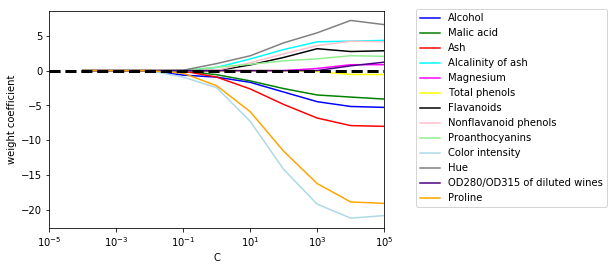

In [235]:
""" 
plot of the regularization path, which is the weight coefficients of the different features
for different regularization strengths
"""
import matplotlib.pyplot as plt
fig = plt.figure() 
ax = plt.subplot(111)   
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']
weights, params = [], [] 
for c in np.arange(-4, 6): 
    lr = LogisticRegression(penalty='l1', C=10.0**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c) 
weights = np.array(weights) 
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],label=df_wine.columns[column+1],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3) 
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

# Sequential feature selection algorithms

In [236]:
"""
Sequential Backward Selection (SBS) algorithm for dimensionality reduction

"""
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

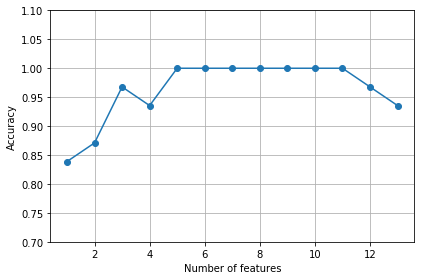

In [237]:
"""
SBS implementation in action using the KNN classifier

"""
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('./sbs.png', dpi=300)
plt.show()

In [238]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [239]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9444444444444444


In [240]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9629629629629629


# Assessing Feature Importances with Random Forests

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


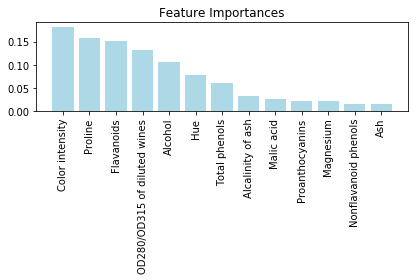

In [241]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('./random_forest.png', dpi=300)
plt.show()

In [242]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.15, prefit=True)
X_selected = sfm.transform(X_train)

X_selected.shape


(124, 3)

In [243]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
